# Prediksi Pasar Modal dengan LSTM

LSTM sangat efektif dalam memprediksi data sekuensial karena dapat menyimpan informasi masa lalu. Hal ini penting dalam kasus prediksi pasar modal karena harga saham sebelumnya sangat penting dalam memprediksi harga di masa depan.

## A.	Import the libraries

Import beberapa packages yang akan digunakan yaitu;
-	Numpy untuk pengolahan data matematis.
-	Matplotlib untuk menggambar grafik
-	Pandas untuk memuat dan mengolah dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## B.	Loading the dataset

a.	Dataset yang akan digunakan untuk training adalah data harga saham TATA dari waktu ke waktu. Data tersebut disimpan dalam file NSE-TATAGLOBAL.csv. Dataset tersebut mengandung beberapa kolom. Kolom Open adalah harga awal sedangkan kolom Close adalah harga akhir suatu saham pada hari perdagangan tertentu. Kolom High dan Low mewakili harga tertinggi dan terendah untuk hari tertentu. Hanya kolom Open yang akan digunakan sebagai training set.

In [18]:
dataset_train = pd.read_csv('NSE-TATAGLOBAL.csv')
training_set = dataset_train.iloc[:, 1:2].values

b.	Menampilkan lima baris teratas dari dataset training, sekedar untuk memperjelas bentuk data yang akan digunakan.

In [19]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


## C.	Feature Scaling

Perlu dilakukan scaling pada data yang digunakan untuk mendapatkan performa model yang optimal. Pada tugas ini digunakan Scikit-Learn MinMaxScaler untuk memetakan data ke dalam skala antara nol dan satu.

In [21]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

## D.	Creating Data with Timesteps

LSTM mensyaratkan data yang digunakan telah dikodekan dalam format tertentu, umumnya array 3D. Pertama-tama, data dibagi dalam 60 timesteps dan mengonversinya menjadi sebuah array menggunakan NumPy. Selanjutnya, data dikonversi menjadi array 3 dimensi dengan sampel X_train, 60 timestamp, dan satu fitur di setiap step.

In [22]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## E.	Building the LSTM

a.	Untuk membangun LSTM, perlu diimpor beberapa library dari Keras yaitu;
-	Sequential untuk membuat neural network.
-	Dense untuk membuat densely connected neural network layer
-	LSTM untuk membuat Long Short-Term Memory layer
-	Dropout untuk membuat dropout layers yang dapat mencegah overfitting


In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

b.	Dibuat LSTM layer dengen beberapa argument yaitu;
-	50 units, yang menggambarkan dimensi output space
-	return_sequences=True, yang memerintahkan output terakhir dari output sequence dijadikan return value.
-	Input shape yang menggambarkan ukuran training set

Pada argumen pembuatan Dropout layer, didefinisikan nilai 0,2. Artinya, 20% dari layer akan dieliminasi. Kemudian, ditambahkan Dense layer yang mendefinisikan output dari satu unit. Model tersebut dicompile menggunakan Adam optimizer dan loss dihitung dengan mean_squared_error. Model dijalankan sebanyak 100 epoch dengan batch size sebesar 32. 


In [24]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1975/1975 [==============================] - 6s 3ms/step - loss: 0.0118
Epoch 2/100
1975/1975 [==============================] - 5s 2ms/step - loss: 0.0031
Epoch 3/100
1975/1975 [==============================] - 5s 2ms/step - loss: 0.0031
Epoch 4/100
1975/1975 [==============================] - 5s 2ms/step - loss: 0.0027
Epoch 5/100
1975/1975 [==============================] - 5s 2ms/step - loss: 0.0025
Epoch 6/100
1975/1975 [==============================] - 5s 2ms/step - loss: 0.0024
Epoch 7/100
1975/1975 [==============================] - 5s 2ms/step - loss: 0.0024
Epoch 8/100
1975/1975 [==============================] - 5s 2ms/step - loss: 0.0020
Epoch 9/100
1975/1975 [==============================] - 5s 2ms/step - loss: 0.0023
Epoch 10/100
1975/1975 [==============================] - 5s 2ms/step - loss: 0.0022
Epoch 11/100
1975/1975 [==============================] - 5s 2ms/step - loss: 0.0016
Epoch 12/100
1975/1975 [==============================] - 5s 2ms/step - lo

## F.	Predicting Future Stock using the Test Set

a.	Setelah membangun model, sekarang saatnya untuk menguji kinerjanya. Pertama-tama, perlu diimpor test set yang akan digunakan untuk membuat prediksi. Dataset yang akan digunakan untuk testing disimpan dalam file tatatest.csv. File tersebut memiliki format yang sama dengan dataset training. Hanya kolom Open yang akan digunakan sebagai test set.


In [25]:
dataset_test = pd.read_csv('tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

b.	Untuk melakukan prediksi harga saham, kita perlu melakukan beberapa hal setelah memuat test set:
-	Gabungkan training set dan test set pada sumbu 0.
-	Atur time step sebesar 60 (seperti pada tahap sebelumnya)
-	Gunakan MinMaxScaler untuk mentransformasikan dataset baru tersebut
-	Kembalikan bentuk dataset menjadi bentuk sebelumnya
-	Setelah membuat prediksi, gunakan inverse_transform untuk mengembalikan harga saham ke dalam format yang mudah dibaca.


In [26]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

## G.	Plotting the Result
Gunakan Matplotlib untuk memvisualisasikan harga saham hasil prediksi dan harga saham yang sebenarnya.

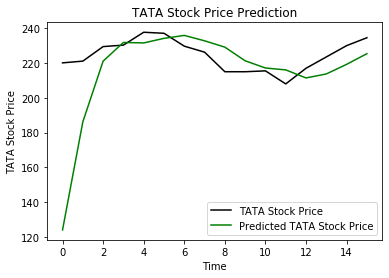

In [27]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

Pada grafik tersebut dapat dilihat bahwa LSTM dapat memprediksi kenaikan dan penurunan harga saham TATA. Dengan demikian, dapat disimpulkan bahwa LSTM dapat memprediksi data sekuensial secara akurat.

## H.	Tamat
